# Jamboree Case Study

### Problem Statement:

- Jamboree is a renowned educational institution that has successfully assisted numerous
  students in gaining admission to top colleges abroad. With their proven
  problem-solving methods, they have helped students achieve exceptional scores on
  exams like GMAT, GRE, and SAT with minimal effort.
- To further support students, Jamboree has recently introduced a new feature on their
  website. This feature enables students to assess their probability of admission to Ivy
  League colleges, considering the unique perspective of Indian applicants.
-  By conducting a thorough analysis, we can assist Jamboree in understanding the crucial
   factors impacting graduate admissions and their interrelationships. Additionally, we can
   provide predictive insights to determine an individual's admission chances based on
   various variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.pipeline import make_pipeline

## 1. Basic Overview of Dataset

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Checking dimension of the dataframe
df.ndim

2

In [4]:
# Checking shape of the dataframe
df.shape

(500, 9)

In [5]:
#  Available colums in the dataframe
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
# Checking for Null values

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Cheking the datatype of each series

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# Dropping Serial No. column as it is not important

df = df.drop(['Serial No.'], axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# Checking for duplicates in dataframe

duplicates = df.duplicated().sum()
print(duplicates)

0


In [10]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

Most of the students got 3 university rating and only 34 students got minimum university rating

## 2. Univariant Analysis

### 2.1 Distribution of data

C:\Users\Adipa\AppData\Local\Temp\ipykernel_4200\2822632072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['GRE Score'])


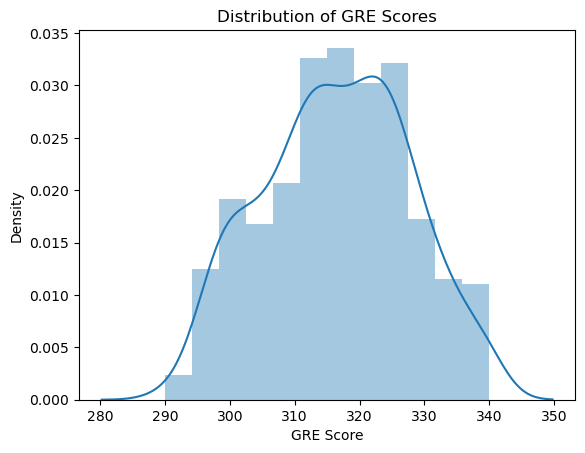

In [12]:
fig = sns.distplot(df['GRE Score'])
plt.title("Distribution of GRE Scores")
plt.show()

C:\Users\Adipa\AppData\Local\Temp\ipykernel_4200\1754368202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['TOEFL Score'])


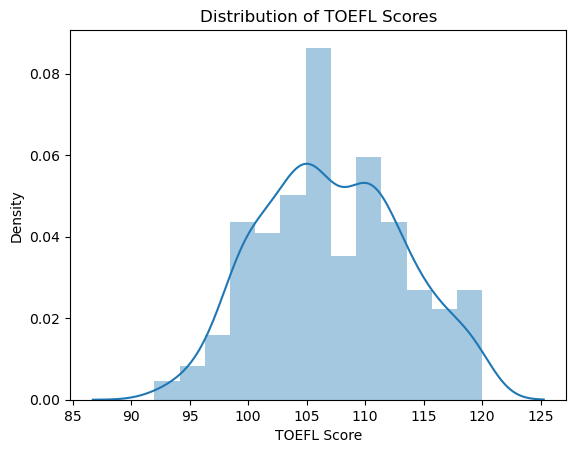

In [13]:
fig = sns.distplot(df['TOEFL Score'])
plt.title("Distribution of TOEFL Scores")
plt.show()

C:\Users\Adipa\AppData\Local\Temp\ipykernel_4200\2368113470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['University Rating'])


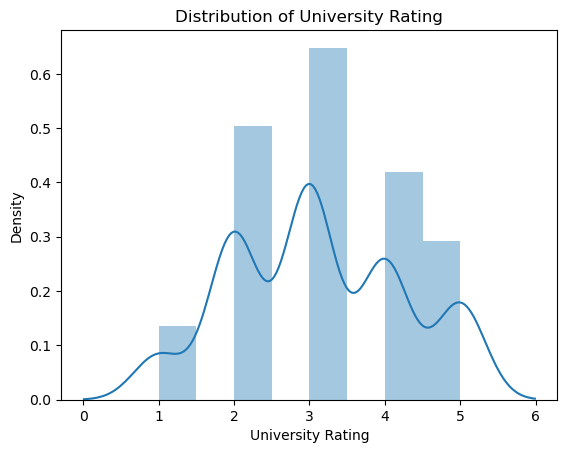

In [14]:
fig = sns.distplot(df['University Rating'])
plt.title("Distribution of University Rating")
plt.show()

C:\Users\Adipa\AppData\Local\Temp\ipykernel_4200\390056784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['SOP'])


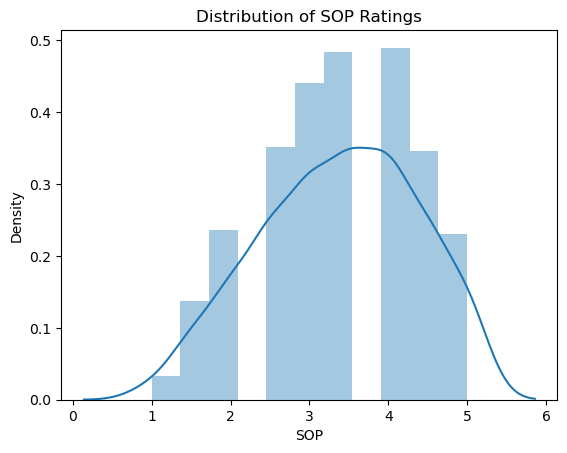

In [15]:
fig = sns.distplot(df['SOP'])
plt.title("Distribution of SOP Ratings")
plt.show()

C:\Users\Adipa\AppData\Local\Temp\ipykernel_4200\2816819927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['CGPA'])


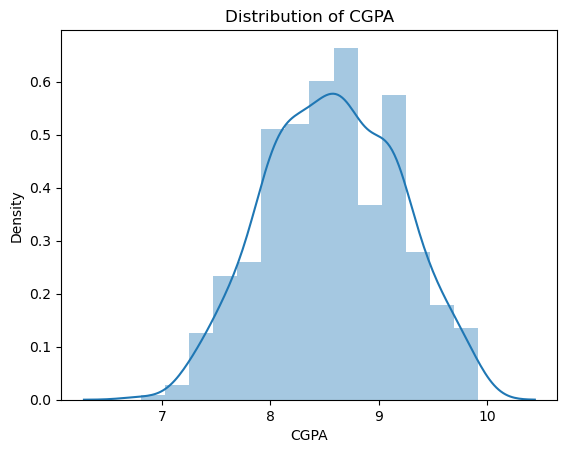

In [16]:
fig = sns.distplot(df['CGPA'])
plt.title("Distribution of CGPA")
plt.show()

The distributions indicate that students of diverse merit levels apply to the university.

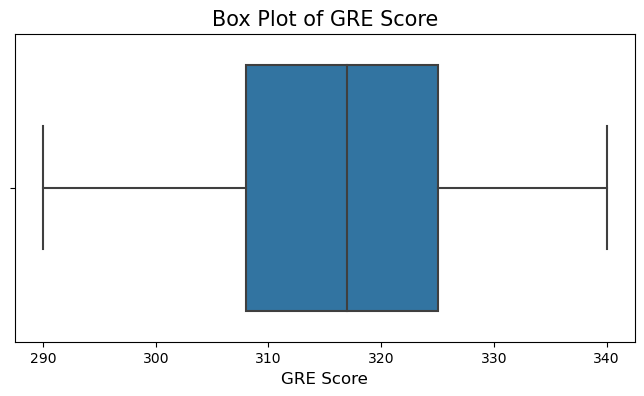

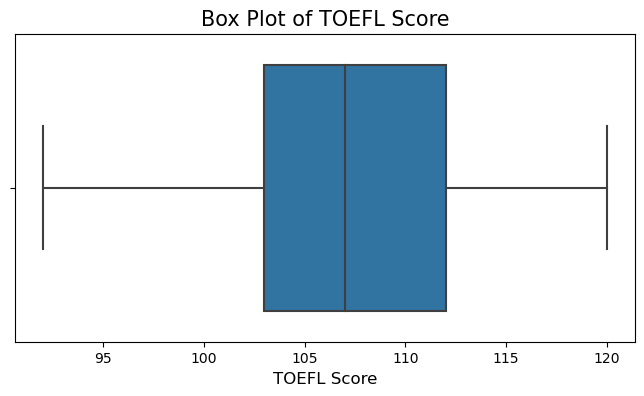

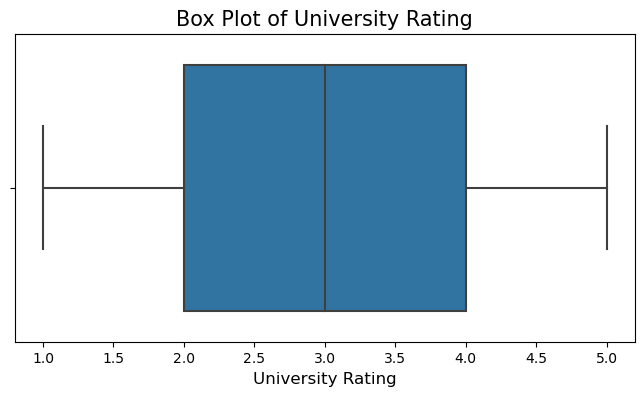

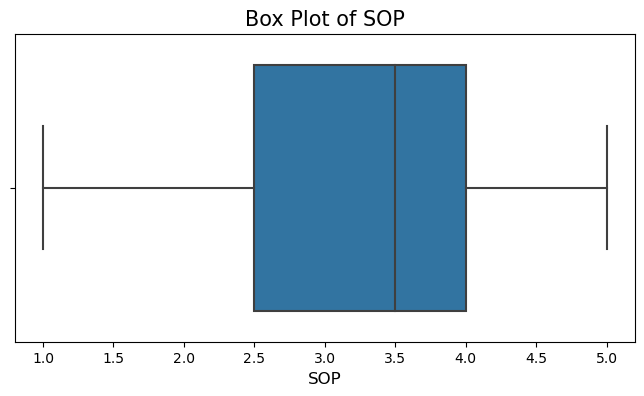

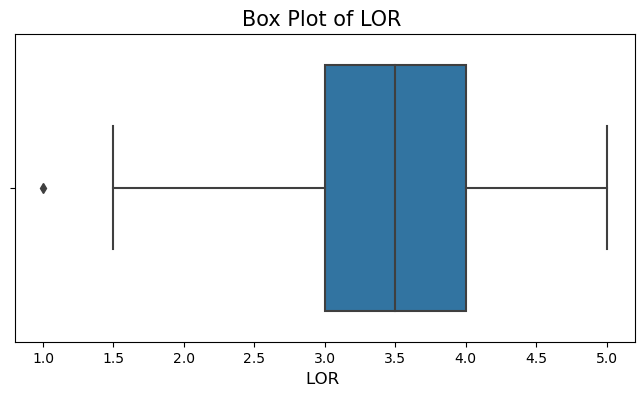

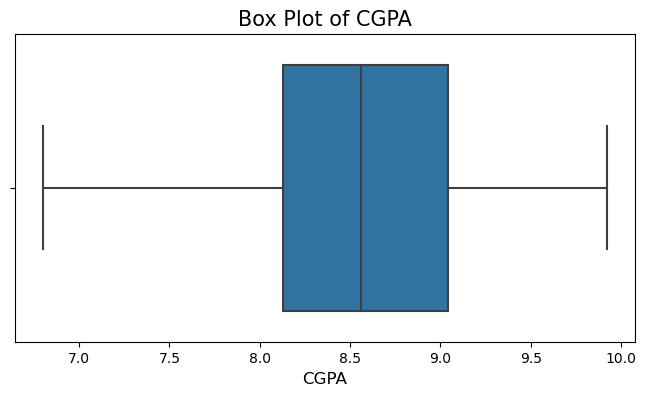

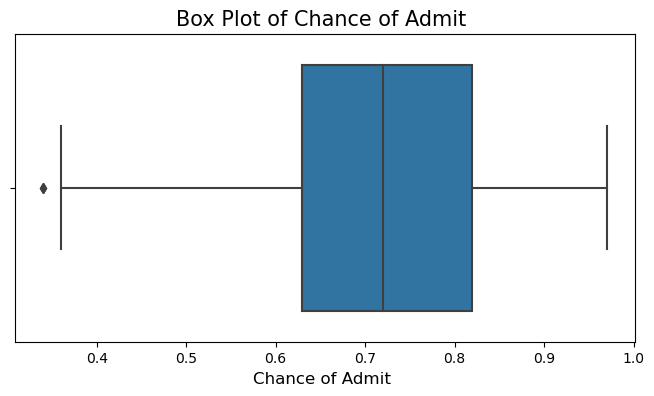

In [17]:
# Creating box plots for each feature

features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}', fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.show()

The data has no major outliers

## 3. Bivariant Analysis

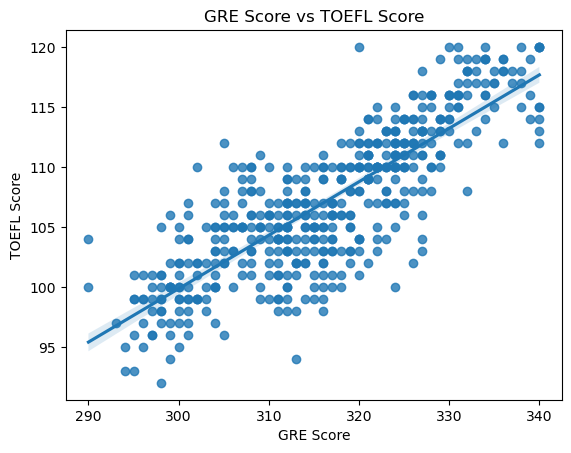

In [18]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

Individuals with higher GRE scores tend to also achieve higher TOEFL scores. This correlation is reasonable, as both tests include a verbal section. While these sections are not identical, they share similarities that make this relationship understandable.

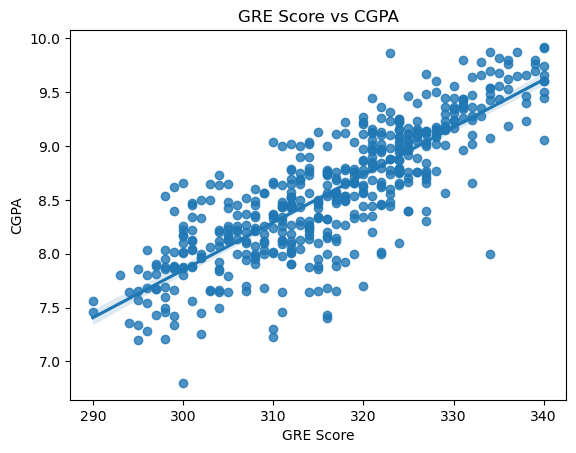

In [19]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Individuals with higher CGPA generally tend to have higher GRE scores. This may be attributed to their intelligence or diligent work habits.







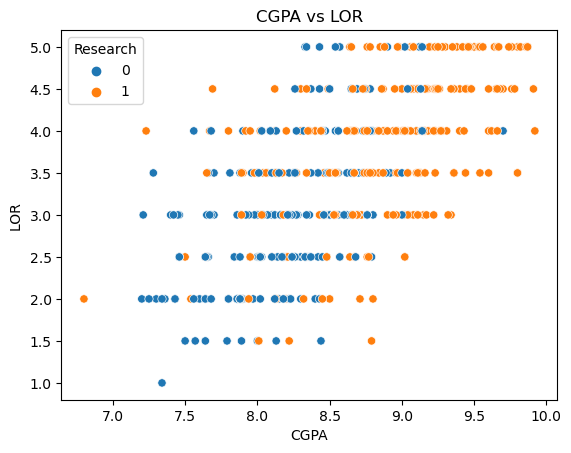

In [20]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

LORs are not strongly correlated with CGPA, indicating that a person's LOR is not necessarily dependent on their academic performance. Typically, having research experience is associated with obtaining a strong LOR. This can be explained by the personal interactions between supervisors and students involved in research, which often lead to favorable LORs.

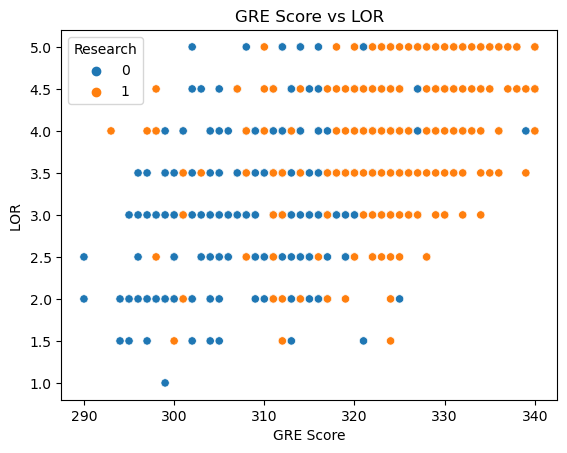

In [21]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()


GRE scores and LORs do not exhibit a strong correlation. Individuals with varying levels of LORs can have a wide range of GRE scores.

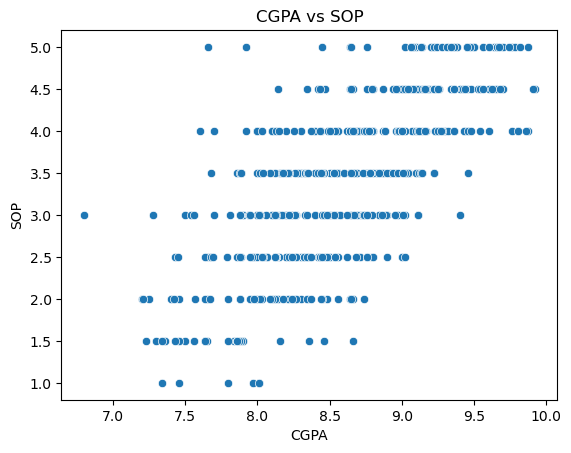

In [22]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("CGPA vs SOP")
plt.show()

CGPA and SOP do not show a strong correlation because, while the Statement of Purpose is related to academic performance, individuals with high CGPA are generally more hardworking and thus have positive content in their SOPs. This might explain the slight tendency for higher CGPA to be associated with better SOPs.

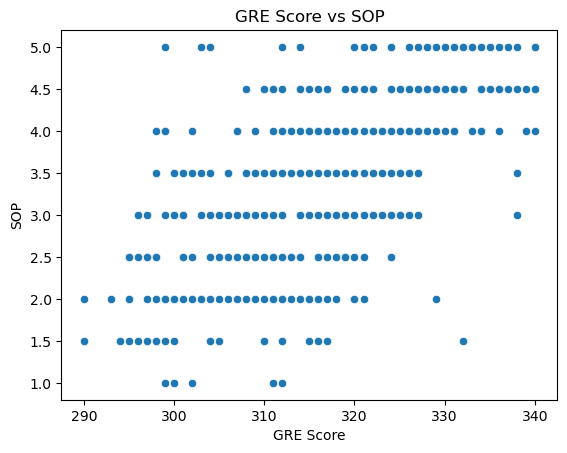

In [23]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()

GRE scores and SOP show only a weak correlation.

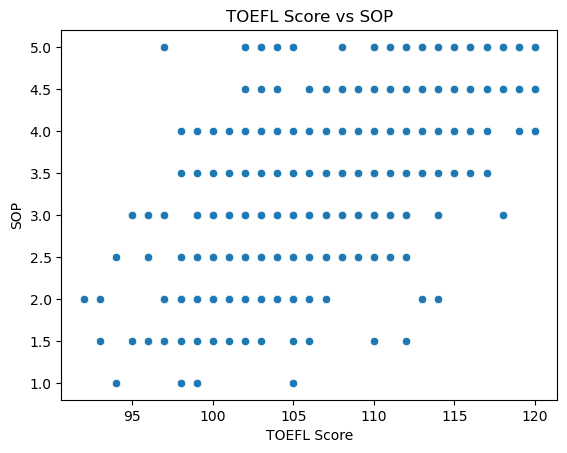

In [24]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()

Low correlation between TOEFL score and SOP

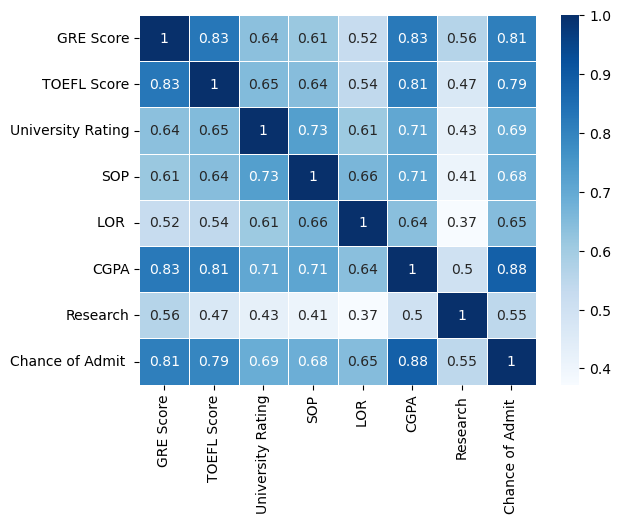

In [25]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True,cmap='Blues')
plt.show()

Following features are highly correlated 

1. GRE Score & TOEFL Score
2. GRE Score & CGPA
3. GRE Score & Chance of Admit
4. TOEFL Score & CGPA
5. TOEFL Score & Chance of Admit
6. University Rating & SOP
7. CGPA & Chance of Admit


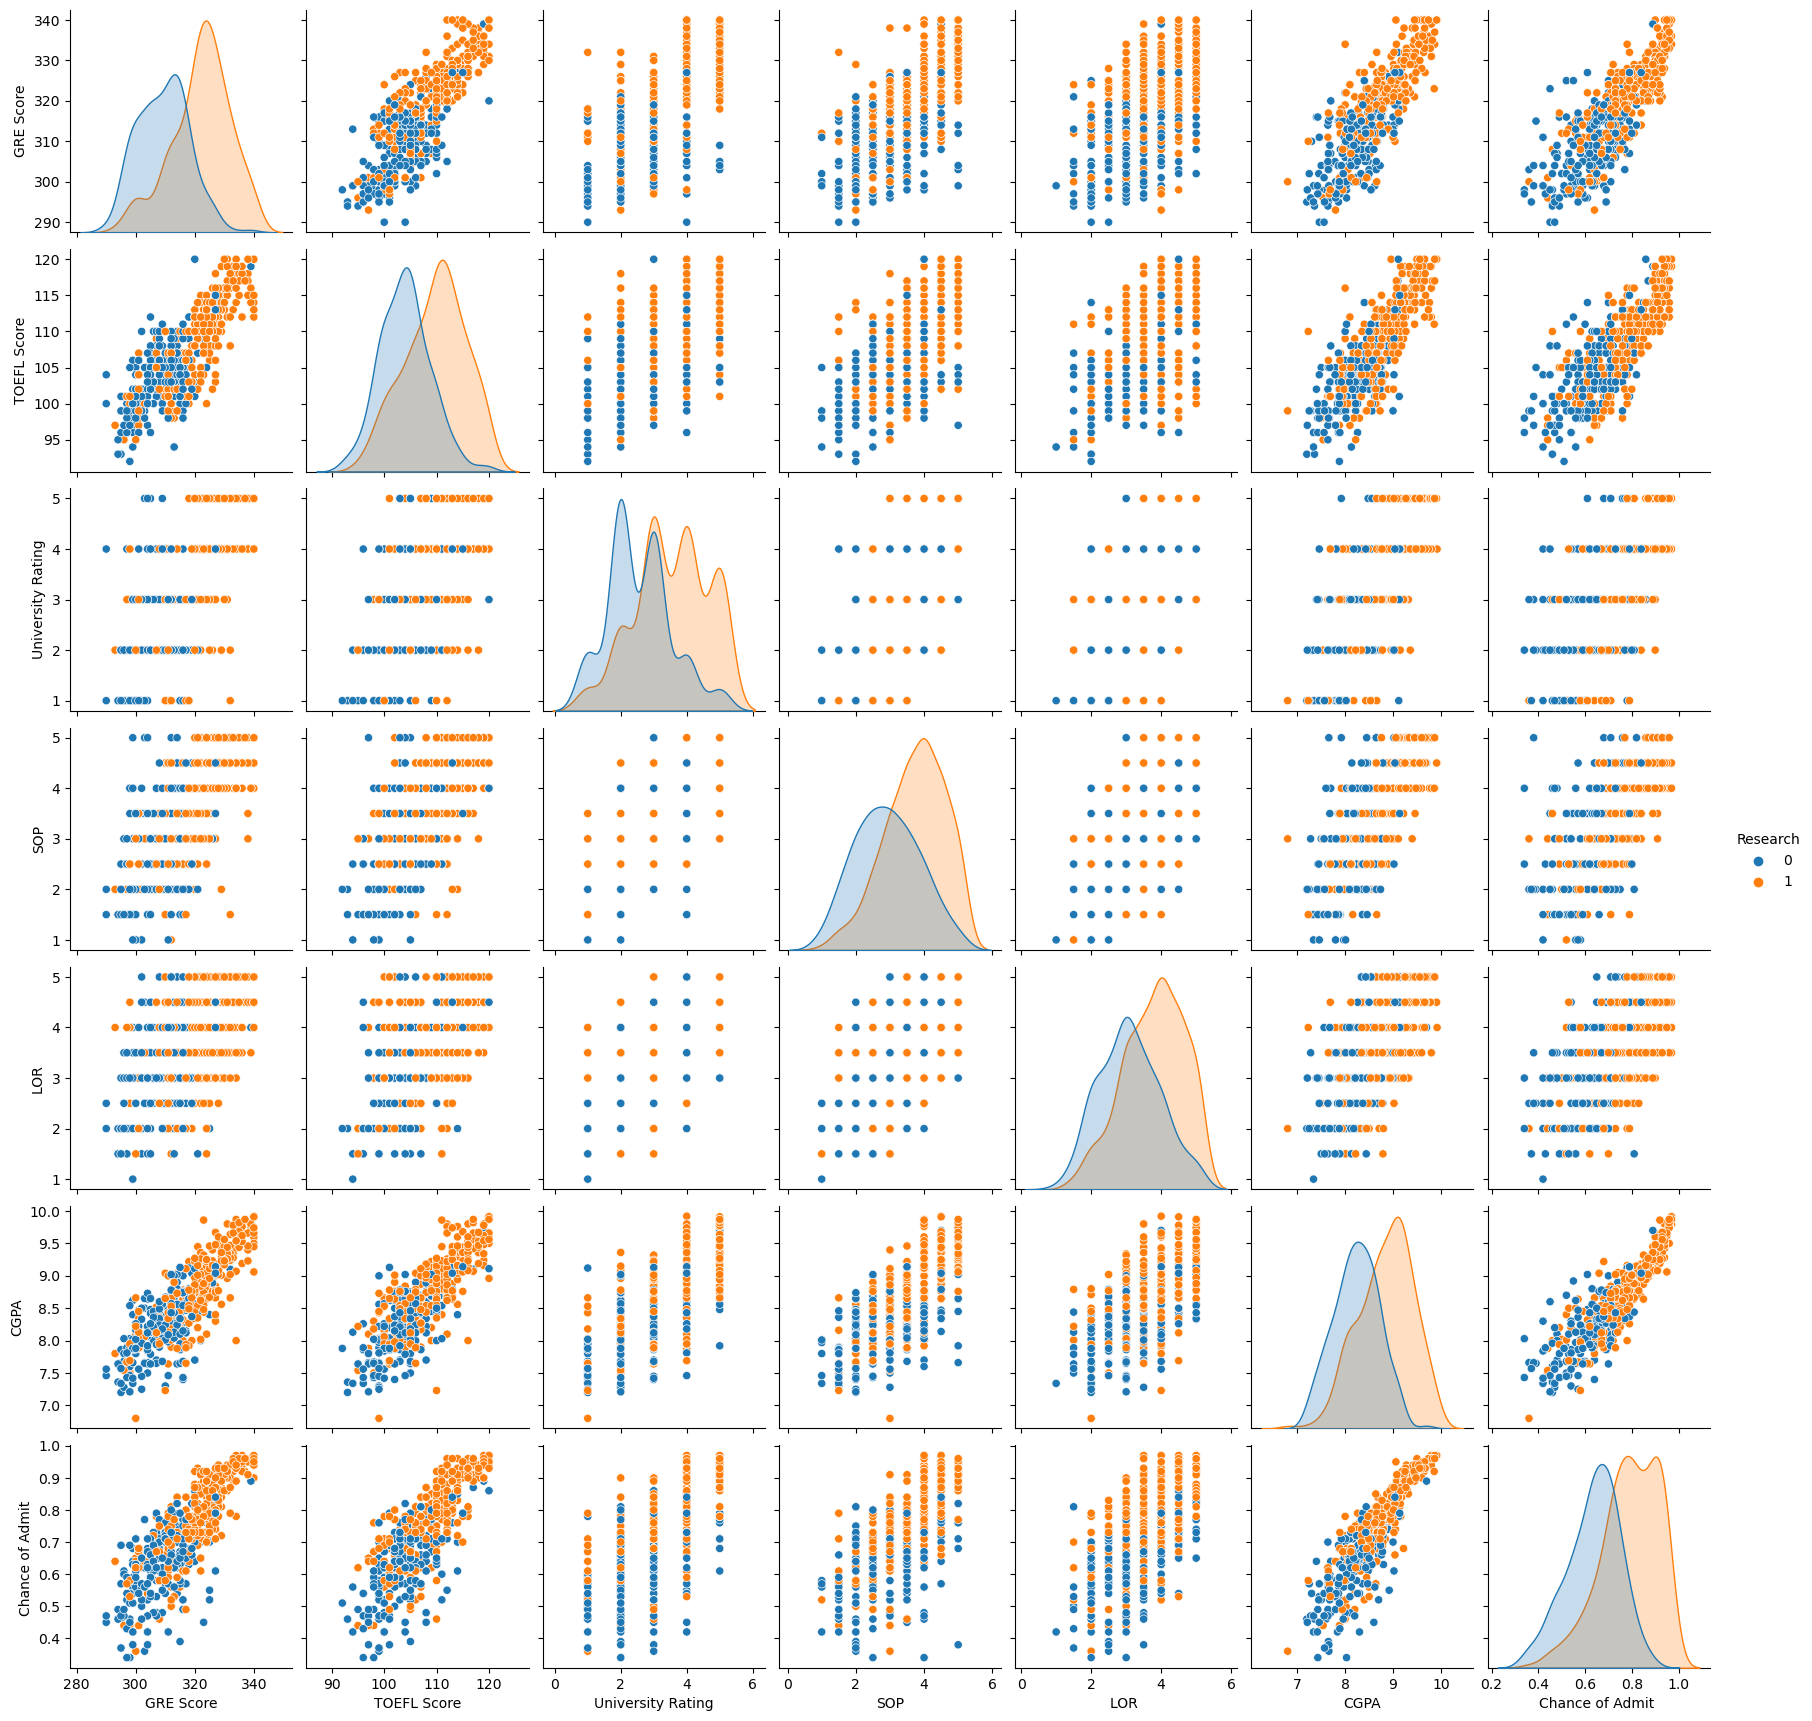

In [67]:
sns.pairplot(df, hue = 'Research')

## 4. Linear Regression Modelling

### 4.1 Splitting the dataset with training and testing set and prepare the inputs and outputs

In [27]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,shuffle =True)

In [29]:
scaler = MinMaxScaler()
X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.60,0.678571,0.75,0.875,0.625,0.663462,1.0
1,0.22,0.178571,0.25,0.500,0.500,0.346154,1.0
2,0.68,0.678571,0.50,0.375,0.250,0.641026,1.0
3,0.54,0.500000,0.25,0.250,0.625,0.423077,0.0
4,0.82,0.857143,1.00,1.000,1.000,0.826923,1.0


In [30]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.56,0.607143,0.50,0.500,0.500,0.544872,0.0
1,0.60,0.428571,0.50,0.500,0.625,0.621795,1.0
2,0.18,0.285714,0.25,0.250,0.250,0.346154,0.0
3,0.28,0.285714,0.25,0.625,0.500,0.455128,0.0
4,0.34,0.321429,0.50,0.750,0.500,0.448718,0.0


In [31]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
model.coef_.round(3)

array([ 0.094,  0.073,  0.03 , -0.001,  0.068,  0.365,  0.027])

In [33]:
model.intercept_

0.35305393902249493

In [34]:
model.score(X_train_scaled, y_train)

0.8347782804869421

In [35]:
model.score(X_test_scaled, y_test)

0.754553339699021

In [36]:
X_test_scaled.shape

(100, 7)

In [43]:
y_pred = model.predict(X_test_scaled) 
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)

Mean Absolute Error (MAE): 0.047049165291812134
Mean Squared Error (MSE): 0.004534565687395512


## 5. Assumptions of Linear Regression

### 5.1 Multicollinearity check by VIF score

In [64]:
vif = pd.DataFrame()

vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,41.99
0,GRE Score,30.61
1,TOEFL Score,27.61
3,SOP,18.70
4,LOR,14.99
2,University Rating,11.49
6,Research,3.46


### 5.2 Mean of Residuals

In [44]:
residuals = y_test - y_pred

# Calculate mean of residuals
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)

Mean of Residuals: -0.005733089011300272


### 5.3 Test for Homoscedasticity

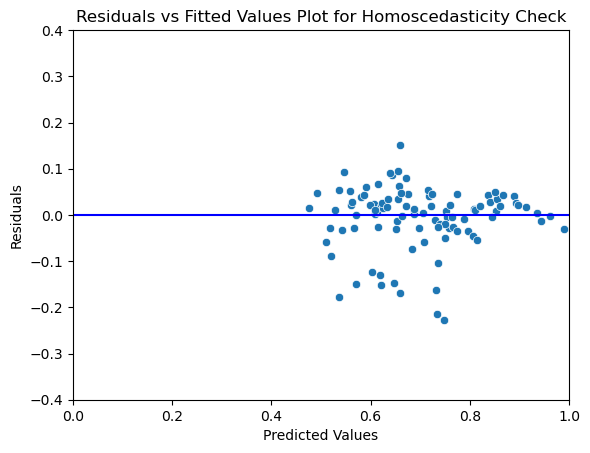

In [45]:
p = sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-0.4, 0.4)
plt.xlim(0, 1)

p = sns.lineplot(x=[0, 1], y=[0, 0], color='blue')
plt.title('Residuals vs Fitted Values Plot for Homoscedasticity Check')
plt.show()



H0 : Heteroscedasticity is not present

Ha : Heteroscedasticity present

In [46]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.7939503820712165), ('p-value', 0.7737642428599396)]

In [66]:
threshold =0.05
p_value = 0.3864426980699932
if p_value < threshold:
    print('Reject H0')
else:
    print('Do not reject H0, Heteroscedasticity is not present')

Do not reject H0, Heteroscedasticity is not present


since p-values >0.05, we fail to reject the null hypothesis


### 5.4 Normality of residuals

C:\Users\Adipa\AppData\Local\Temp\ipykernel_4200\3040778317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


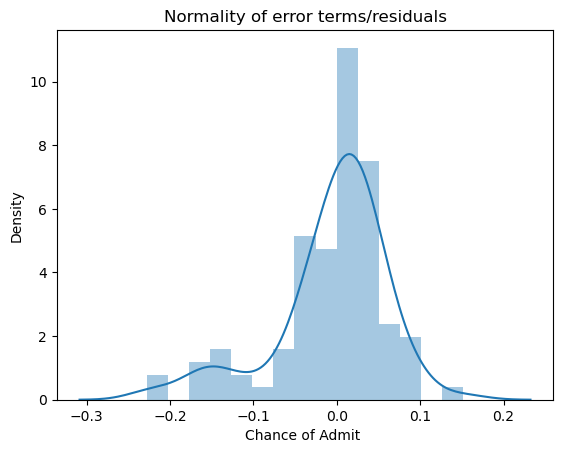

In [48]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

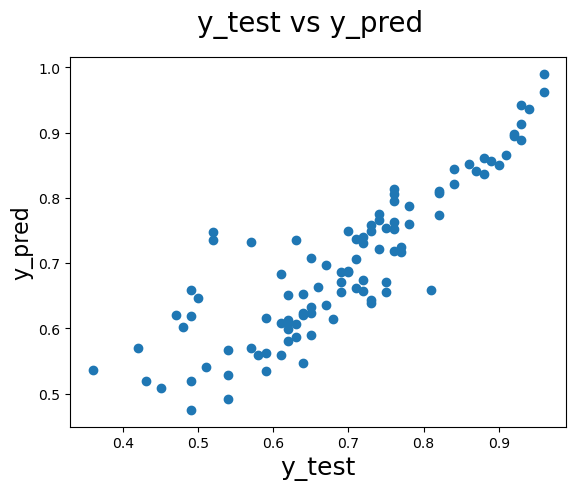

In [49]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16) 

Not a proper linear trend

## 6. Evaluating the model’s performance.

In [50]:
y_pred = model.predict(X_test_scaled)

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", MAE)

# Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", MSE)

# Root Mean Square Error (RMSE)
RMSE = np.sqrt(MSE)
print("Root Mean Square Error (RMSE):", RMSE)

# R-squared value (R2 score)
R2 = r2_score(y_test, y_pred)
print("R-squared value (R2):", R2)

# Adjusted R-squared value
n = len(y_test)  # number of observations
p = X_test_scaled.shape[1]  # number of predictors

Adjusted_R2 = 1 - (1 - R2) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared value:", Adjusted_R2)


Mean Absolute Error (MAE): 0.047049165291812134
Mean Squared Error (MSE): 0.004534565687395512
Root Mean Square Error (RMSE): 0.0673391838931503
R-squared value (R2): 0.754553339699021
Adjusted R-squared value: 0.7358780503282945


## 7. Polynomial Regression

In [51]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [52]:
X_train.shape

(300, 7)

In [53]:
X_val.shape

(100, 7)

In [54]:
X_test.shape

(100, 7)

In [55]:
def adj_r2(X,Y, r2):

    res = (1 - ((1-r2)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
    return res

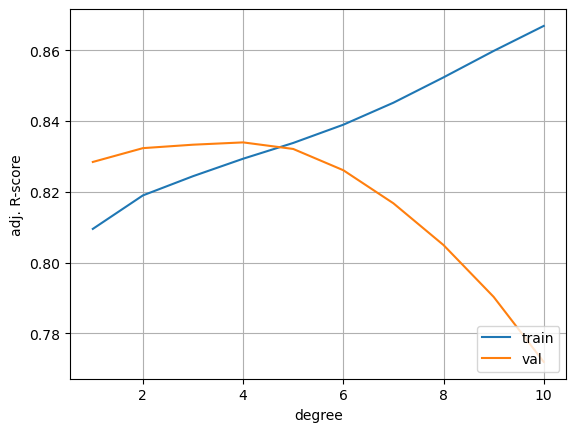

In [56]:
max_degree = 11 # max polynomial degree

train_scores = []
val_scores = []

scaler = StandardScaler()

for degree in range(1, max_degree):

  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)

  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(range(1, max_degree)), train_scores, label="train")
plt.plot(list(range(1, max_degree)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [57]:
val_scores[:5]

[0.8284121593624856,
 0.8323155720053602,
 0.8332891292725441,
 0.833939684870595,
 0.8320846521054002]

In [58]:
train_scores = []
val_scores = []

lambda_list = np.arange(0.01, 10, 0.1) # [0.01, 0.1, 1, 5, 10]

for rate in lambda_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)

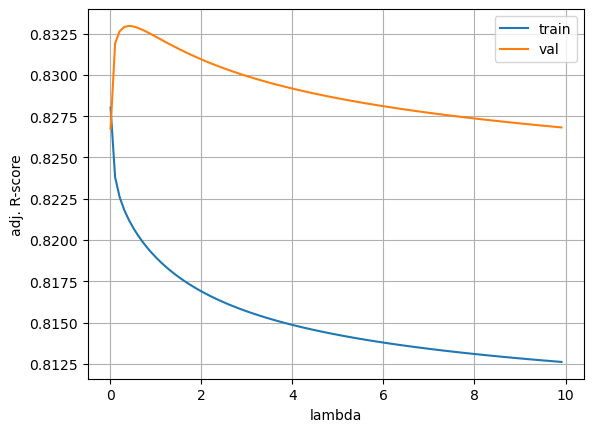

In [59]:
plt.figure()
plt.plot(lambda_list, train_scores, label="train")
plt.plot(lambda_list, val_scores, label="val")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [60]:
np.argmax(val_scores)

4

In [61]:
lambda_list[4]

0.41000000000000003

In [62]:
final_model = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=0.41))

final_model.fit(X_train, y_train)


train_score = adj_r2(X_train, y_train, final_model.score(X_train, y_train))
print(f'Training Score = {train_score}')

val_score = adj_r2(X_val, y_val, final_model.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.821225962317023
Validation Score = 0.8329635891140383


In [63]:
test_score = adj_r2(X_test, y_test, final_model.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.8116873520054815


## 8. Insights and Recomendation 

### 8.1 Insights

- The distributions of different features indicate that students of diverse merit levels applied to the university.
- Individuals with higher GRE scores tend to also achieve higher TOEFL scores. This correlation is reasonable, as both tests include a verbal section. While these sections are not identical, they share similarities that make this relationship understandable.
- Individuals with higher CGPA generally tend to have higher GRE scores. This may be attributed to their intelligence or diligent work habits.
- LORs are not strongly correlated with CGPA, indicating that a person's LOR is not necessarily dependent on their academic performance. Typically, having research experience is associated with obtaining a strong LOR. This can be explained by the personal interactions between supervisors and students involved in research, which often lead to favorable LORs.
- GRE scores and LORs do not exhibit a strong correlation. Individuals with varying levels of LORs can have a wide range of GRE scores.
- CGPA and SOP do not show a strong correlation because, while the Statement of Purpose is related to academic performance, individuals with high CGPA are generally more hardworking and thus have positive content in their SOPs. This might explain the slight tendency for higher CGPA to be associated with better SOPs.
- Low correlation between TOEFL score and SOP
- Following features are highly correlated

    1.GRE Score & TOEFL Score

    2.GRE Score & CGPA

    3.GRE Score & Chance of Admit

    4.TOEFL Score & CGPA

    5.TOEFL Score & Chance of Admit

    6.University Rating & SOP

    7.CGPA & Chance of Admit 
    
- While checking assumptions of linear regression the value of Mean of Residual is -0.00573
- The data does not have Heteroscedasticity.
- Residuals follows normal distribution.
- the graph of predicted value vs tested values does not follow proper linear trend
- Mean Squared Error (MSE) for linear regression model is 0.00453
- Adjusted R-squared value for linear regression model is 0.73587
- To increase the R-squared value polynomial regression were used and the R-squared value for it is 0.81168

### 8.2 Recomendations

- **Prioritize CGPA**: Encourage students to prioritize maintaining a high CGPA throughout their academic journey. They should aim to excel in their coursework, assignments, and examinations to achieve a competitive CGPA. Emphasize the importance of consistent academic performance as it serves as a primary indicator of an applicant's academic ability and potential for success in graduate studies.

- **Focus on Achieving Competitive GRE and TOEFL Scores after CGPA**: After CGPA, GRE and TOEFL scores are identified as significant factors for admission. Students should allocate sufficient time and resources to prepare for these standardized tests. Recommend engaging in structured study plans, practice tests, and seeking guidance from tutors or preparatory courses to improve performance in these exams. Emphasize the importance of attaining competitive scores to strengthen their candidacy for admission.

- **Engage in Research Activities**: Participation in research activities, including writing research papers, significantly enhances the likelihood of admission. Encourage students to actively seek opportunities to engage in research projects, collaborate with faculty members, and contribute to research publications. Research involvement not only demonstrates academic curiosity and intellectual rigor but also showcases an applicant's ability to contribute to the scholarly community.

- **Allocate Less Emphasis on the Statement of Purpose (SOP) Compared to Other Factors**: While the Statement of Purpose (SOP) is an essential component of the application, it is identified as the least important factor for admission. Advise students to craft a well-written SOP that reflects their academic aspirations, relevant experiences, and alignment with the program objectives. However, emphasize that while the SOP should not be overlooked, greater emphasis should be placed on factors such as CGPA, GRE, TOEFL scores, and research engagement when preparing their application.

